In [1]:
%load_ext autoreload
import uproot as ut
import utils
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import vector

from tqdm import tqdm

from utils.cutConfig import *
%autoreload 2

In [2]:
filename = "../signal/NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_May2021.root:sixBtree"
ttree = ut.open(filename)
branches = utils.Branches(ttree)
preselection = utils.Selection(branches,cuts={"njetcut":6,"etacut":None},tag="preselection")
sixb_in_preselection = preselection.nsixb_selected == 6
print(preselection)
baseline = utils.Selection(branches,cuts={"etacut":None},mask=sixb_in_preselection,variable="jet_btag",include=preselection,tag="baseline")
print(baseline)

--- all  ---
Event Efficiency:      0.84
Event Selected Purity: 0.29
--- all baseline ---
Event Efficiency:      0.29
Event Selected Purity: 1.00


# Selection Study

--- all baseline / jet_ptRegressed ---
Event Efficiency:      0.29
Event Selected Purity: 1.00
0.30 & 0.64 & 0.85 & 0.95


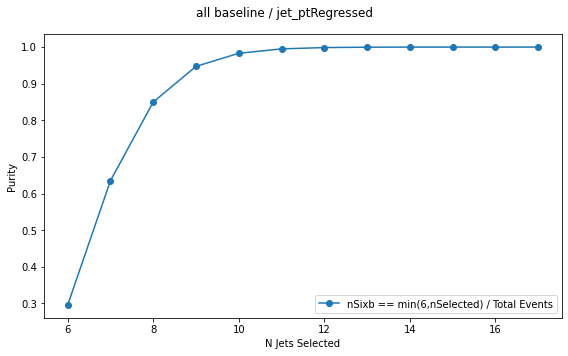

In [21]:
baseline_ptorder = baseline.sorted_jets("jet_ptRegressed")
utils.selection_study(baseline_ptorder,latex=1,saveas="ptorder")

In [3]:
inside_btag = utils.Selection(branches,variable="jet_btag",include=baseline,tag="inside btagging")

--- all baseline & all inside btagging / jet_btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.89


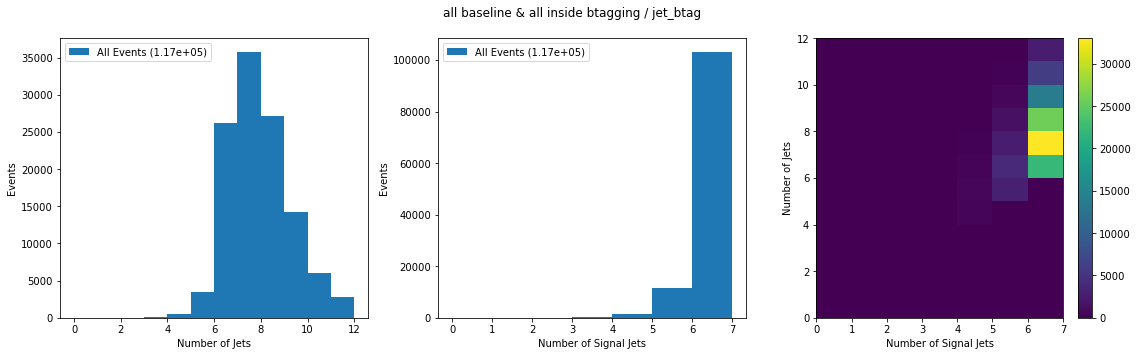

In [4]:
utils.njet_study(inside_btag)

--- all baseline & all inside btagging / jet_btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.89
0.62 & 0.78 & 0.85 & 0.87


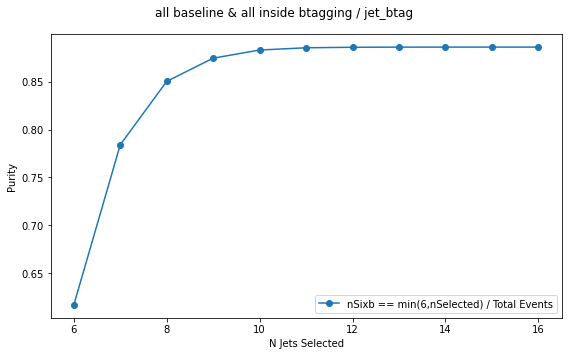

In [5]:
utils.selection_study(inside_btag,latex=1,saveas="inside_btag")

## Trial Selection

In [6]:
first_jet_lbtag = utils.Selection(branches,cuts={"btagcut":jet_btagWP[looseWP]},variable="jet_btag",njets=6,tag="jet lbtag",include=baseline)

In [7]:
second_remaining = utils.Selection(branches,cuts={"etacut":None},variable="jet_ptRegressed",tag="remaining",previous=first_jet_lbtag,include=baseline)

In [8]:
merged_selection = second_remaining.merge()

--- all baseline & 6 jet lbtag / jet_btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.45
0.99 & 0.97 & 0.95 & 0.92


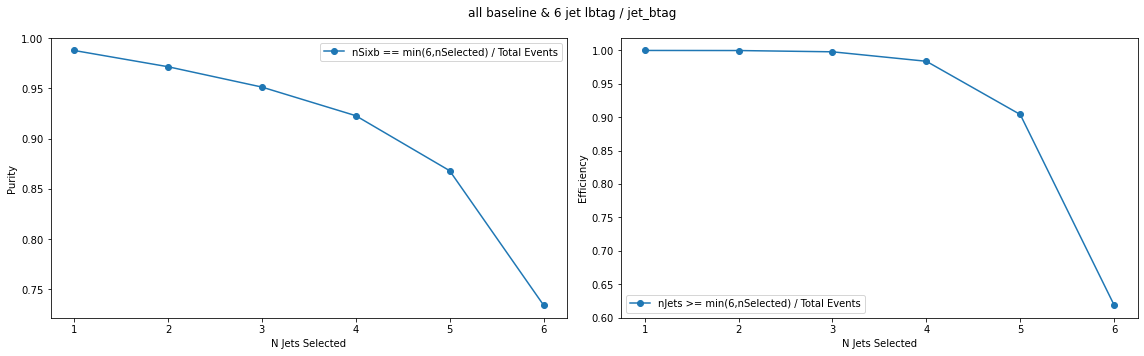

In [9]:
utils.selection_study(first_jet_lbtag,latex=1,under6=1,required=1)

--- all baseline & 6 jet lbtag / jet_btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.45
0.99 & 0.97 & 0.95 & 0.91


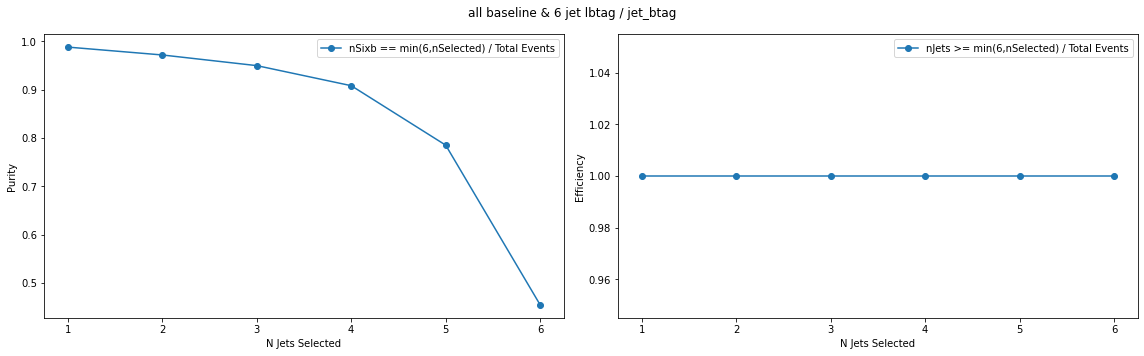

In [10]:
utils.selection_study(first_jet_lbtag,latex=1,under6=1)

--- all baseline & (6 jet lbtag / jet_btag | all remaining / jet_ptRegressed) ---
Event Efficiency:      1.0
Event Selected Purity: 0.00


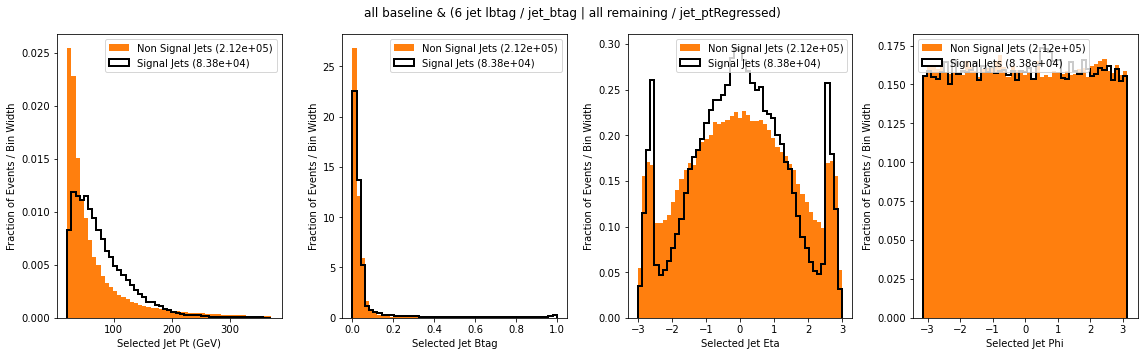

In [17]:
utils.jet_study(second_remaining,saveas="remaining")

--- all baseline & (6 jet lbtag / jet_btag | all remaining / jet_ptRegressed) ---
Event Efficiency:      1.0
Event Selected Purity: 0.00


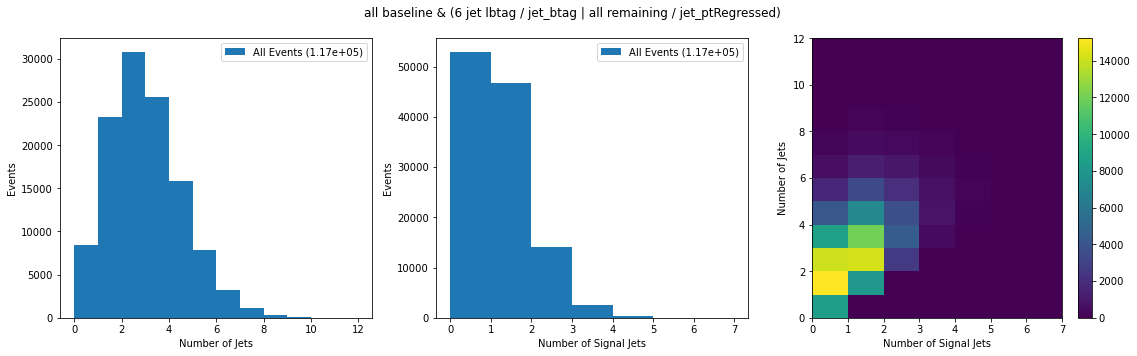

In [12]:
utils.njet_study(second_remaining,saveas="remaining")

--- all baseline & (6 jet lbtag / jet_btag | all remaining / jet_ptRegressed) merged ---
Event Efficiency:      1.0
Event Selected Purity: 1.00
0.63 & 0.83 & 0.94 & 0.98


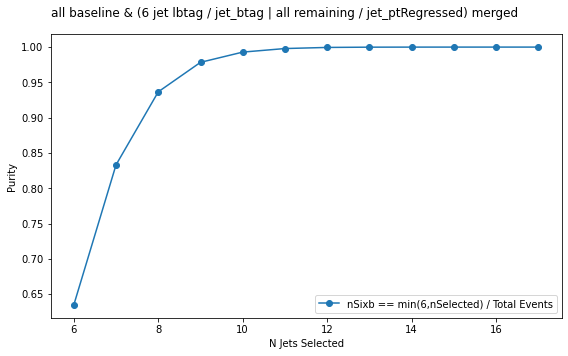

In [16]:
utils.selection_study(merged_selection,latex=1,saveas="full_selection")